# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
#df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')

In [3]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)

In [4]:
df.head(5)

Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0           10024     BLUE MACK             M               Unknown   
1           10461  Indie Zephir             M            Rottweiler   
2           10013         Bilal             M  Australian Cattledog   
3           10025         Buddy             M               Unknown   
4           10013           Ali             M               Basenji   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1             NaN                 BLACK                    TAN   
2             NaN                  Rust                    NaN   
3        Cockapoo                 BLOND                  WHITE   
4             NaN                 Black                    NaN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1                NaN   2013-04-01             No               No        Yes   
2                NaN   2014-09-01            Yes              NaN         No   
3                NaN   2008-04-01            Yes               No        Yes   
4                NaN   2014-01-01             No              NaN         No   

         Application Date License Issued Date License Expired Date  
0 2012-09-19 16:01:19.647          2015-09-19           2016-09-19  
1 2013-09-20 11:41:36.647          2014-09-20           2018-09-20  
2 2014-09-12 13:13:36.713          2014-09-12           2019-09-12  
3 2014-09-12 15:26:51.417          2014-09-12           2017-10-20  
4 2014-09-12 15:43:17.707          2014-09-12           2019-09-12

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

* *Tip: there's an option with `.read_csv` to only read in a certain number of rows*

In [5]:
#number of raws in the data
df.shape[0]

30000

In [6]:
#data types of each columns
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

----
<font color="blue"><b>**my answer**</b>:</font><br>
Each row is a registered pet in New York City.<br><br>
`Owner Zip Code` is a zip code of the owner's address.<br>
`Vaccinated` is whether the pet is vaccinated or not. Shown as <YES/NO><br>
----

In [7]:
#check column names
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

In [8]:
#check data in Vaccinated column
df.Vaccinated.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
#check data in Owner Zip Code
df['Owner Zip Code'].unique()

array([10024, 10461, 10013, 10025, 10035, 10465, 10028, 11232, 10022,
       11209, 11215, 10312, 11220, 10002, 10308, 11201, 11218, 11208,
       10003, 11238, 10463, 10011, 11231, 10305, 11361, 10021, 11236,
       10471, 10023, 11224, 11104, 11379, 10012, 10029, 10467, 11374,
       10038, 10451, 10309, 10034, 10065, 10031, 11106, 10016, 11217,
       11435, 10001, 10128, 11211, 11230, 11101, 10475, 10039, 11375,
       11385, 11365, 10306, 11216, 10462, 10036, 10019, 10458, 11228,
       11221, 11354, 11214, 10307, 10027, 10314, 11102, 10301, 11237,
       11234, 11427, 11205, 11355, 10017, 11222, 11364, 11206, 11249,
       11377, 10466, 10310, 10473, 10026, 10033, 10014, 11372, 11694,
       10469, 10040, 10032, 11358, 10044, 10009, 11414, 10456, 11109,
       11429, 11378, 11105, 11373, 11426, 11362, 10037, 11229, 10282,
       11225, 11416, 10075, 10459, 10280, 10304, 11235, 10007, 10005,
       11415, 10452, 11226, 11219, 11418, 10470, 11233, 10010, 11368,
       11223, 11239,

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

---
<font color="blue">**my questions**:</font><br>
<li>What percentage of the pets are vaccinated?</li>
<li>What percentage of the pets are guard or trained?</li>
<li>What percentage of the pets are spayed or neut?</li>
<li>What are the popular breeds?</li>
<li>Is license issued without delay for all the owners?</li>
<li>If there are pets with shorter duration of licence, why is it? Are there any difference by vaccination status or training status etc?</li><br>

---

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [16]:
#top 10 breed
df['Primary Breed'].value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: Primary Breed, dtype: int64

In [20]:
#replace 'Unknown'
df['Primary Breed'] = df['Primary Breed'].replace('Unknown', np.nan)

In [21]:
#top 10 breed excluding unknown
df['Primary Breed'].value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

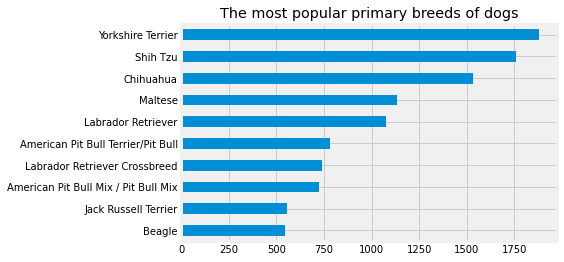

In [22]:
#top 10 graph
df['Primary Breed'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title('The most popular primary breeds of dogs')
plt.show()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

* *Tip: Maybe you want to go back to your `.read_csv` and use `na_values=`? Maybe not? Up to you!*

In [23]:
#I have done it with 3.1

## What are the most popular dog names?

In [26]:
#popular names
df['Animal Name'].value_counts().head(10)

UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: Animal Name, dtype: int64

In [27]:
#replace names "Unknown" with np.nan
df.loc[df['Animal Name'].str.contains('unknown', case=False, na=False),'Animal Name'] =np.nan

In [28]:
#popular names excluding unknown
df['Animal Name'].value_counts().head(10)

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [30]:
#cleaning data
#strip
df['Animal Name'] = df['Animal Name'].apply(lambda x: str(x).strip())
df['Animal Name'] = df['Animal Name'].replace('nan', np.nan)

In [86]:
#all the max names
names = df.loc[df['Animal Name'].str.contains('Max', case=False, na=False),'Animal Name'].unique()
numbers = df[df['Animal Name'].str.contains('Max', case=False, na=False)].shape[0]

print(f"There are {numbers} dogs with Max names.\n")
print('Names:\n', ', '.join(names))

There are 504 dogs with Max names.

Names:
 Max, Maximus, Maxx  AKA Carter, Maxi, MAX, max, Max Marder Klein, MAXINE, Maxwell, Maxx, Maximilian Court Krsnak, MAXIMUS, Max Fincher, MAX PEPPER, Maximillion Alberich, Maxi Rodriguez, Maximus Mushyakov, Maximilian, max torres, Max Bailey, Maxwell Miller, Max Buddy Boy, Max Troni, Maxemillian Pegases, Maxy, Blue Maxius, Max Di Marco, Maximus Von Warrior - Lemon, Max Pila, Maxflower, Max Ortiz, Maximo, Maxxie, Max Whang, MAXWELL, MAXIE, Buddy Max, Max Caminiti, Maximillia, Maximillion, MAXAILLION, BROWNIE MAXIMILIANO, MAX POWER, Max Rodriguez, Max Feldman, MAX LEAR, Max Whitfield, MAXIMUS GARCIA, Maxine, Maximus Prime Berrios, Maximus D., MAXWELL ED, Maxie, maximillion, maximus, Max Brewer, Billy Max, maxi, MAXX, Max Garcia, Lucky Max, MAX A MILL, Max Suarez, maxx, MAXI, SIR MAXIMUS LENIS, Maxine Pickles, Sparticus Maxmus Aurelis, MAX MYERS, Maxcine, Handsome Max, Maxwell Kendall, Maxximus, Maxwell Smart, Max Bollers, Maximillian, Max Deprinc

In [85]:
#Only"Max (with either upper/lowercase)"
names = df[df['Animal Name'].str.contains('^Max$', case=False, na=False, regex=True)]['Animal Name'].unique()
numbers = df[df['Animal Name'].str.contains('^Max$', case=False, na=False, regex=True)].shape[0]

print(f"Among them, {numbers} dogs are registered as 'Max'.\n")
print('Names:\n', ', '.join(names))

Among them, 297 dogs are registered as 'Max'.

Names:
 Max, MAX, max


In [79]:
#all the Maxwell names
names = df[df['Animal Name'].str.contains('Maxwell', case=False, na=False, regex=True)]['Animal Name'].unique()
numbers = df[df['Animal Name'].str.contains('Maxwell', case=False, na=False, regex=True)].shape[0]

print(f'{numbers} dogs are named "Maxwell".\n')
print('Names:\n', ', '.join(names))

25 dogs are named "Maxwell".

Names:
 Maxwell, Maxwell Miller, MAXWELL, MAXWELL ED, Maxwell Kendall, Maxwell Smart, Maxwell Beckman Donennelli, Maxwell Marshall Brown, Maxwell Star, MAXWELL PALISWIAT, SamsonMaxwellWalterZane(Sammy)


In [84]:
#Only "Maxwell(with either upper/lowercase)"
names = df[df['Animal Name'].str.contains('^Maxwell$', case=False, na=False, regex=True)]['Animal Name'].unique()
numbers = df[df['Animal Name'].str.contains('^Maxwell$', case=False, na=False, regex=True)].shape[0]

print(f"Among them, {numbers} dogs are registered as 'Maxwell'.\n")
print('Names:\n', ', '.join(names))

Among them, 16 dogs are registered as 'Maxwell'.

Names:
 Maxwell, MAXWELL


## What percentage of dogs are guard dogs?

In [88]:
#check data
df['Guard or Trained'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [91]:
# percentage excluding na values
df['Guard or Trained'].value_counts(normalize=True) *100

No     99.914254
Yes     0.085746
Name: Guard or Trained, dtype: float64

In [92]:
# percentage including na values
df['Guard or Trained'].value_counts(dropna=False, normalize=True) *100

No     66.030000
NaN    33.913333
Yes     0.056667
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [93]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`. Think about missing data!

In [100]:
# if you add that up, is it the same as your number of rows?
#add numbers up
#It's NOT the same as the number of all the rows (30000)
df['Guard or Trained'].value_counts().sum()

19826

In [112]:
#Where are the other dogs????
print(f"{len(df) - df['Guard or Trained'].value_counts().sum()} are missing because they have 'na' values for 'Guard ot Trained' column.")

10174 are missing because they have 'na' values for 'Guard ot Trained' column.


In [113]:
#How can we find them??????
#by filtering na data
df[df['Guard or Trained'].isna()].head()

Owner Zip Code       Animal Name Animal Gender  \
2            10013             Bilal             M   
4            10013               Ali             M   
5            10013             Queen             F   
6            10035  Paige Sable Orta             F   
11           11232            muneca             F   

                           Primary Breed Secondary Breed  \
2                   Australian Cattledog             NaN   
4                                Basenji             NaN   
5                       Akita Crossbreed             NaN   
6   American Pit Bull Mix / Pit Bull Mix             NaN   
11                                Beagle             NaN   

   Animal Dominant Color Animal Secondary Color Animal Third Color  \
2                   Rust                    NaN                NaN   
4                  Black                    NaN                NaN   
5               Charcoal                    Red                NaN   
6                  White                   Gray                NaN   
11                 White                  Black              Brown   

   Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
2    2014-09-01            Yes              NaN         No   
4    2014-01-01             No              NaN         No   
5    2013-04-01             No              NaN        Yes   
6    2014-07-01             No              NaN         No   
11   2013-05-01            Yes              NaN        Yes   

          Application Date License Issued Date License Expired Date  
2  2014-09-12 13:13:36.713          2014-09-12           2019-09-12  
4  2014-09-12 15:43:17.707          2014-09-12           2019-09-12  
5  2014-09-12 16:14:48.487          2014-09-12           2017-09-12  
6  2014-09-12 16:22:54.113          2014-09-12           2017-09-12  
11 2014-09-13 00:58:36.603          2014-09-13           2019-09-13

## Maybe fill in all of those empty "Guard or Trained" columns with "No"? Or as `NaN`? 

Can we make an assumption either way? Then check your result with another `.value_counts()`

In [117]:
#Yes/No + counting NaN 
df['Guard or Trained'].value_counts(dropna=False, normalize=True) * 100

No     66.030000
NaN    33.913333
Yes     0.056667
Name: Guard or Trained, dtype: float64

In [120]:
#counting NaN as "No"
df['Guard or Trained'].fillna('No').value_counts(normalize=True) * 100

No     99.943333
Yes     0.056667
Name: Guard or Trained, dtype: float64

## What are the top dog breeds for guard dogs? 

In [122]:
#the top dog breeds for guard dogs
df.loc[df['Guard or Trained']=='Yes','Primary Breed'].value_counts().head(5)

German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [123]:
#take out year and assign it as a new column
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [124]:
#calculate age and assign it as a new column
df['age'] = 2022 - df.year

In [128]:
#average age of dogs
print(f"Dogs are {df.age.mean():.1f} years old on average.")

Dogs are 12.7 years old on average.


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [130]:
#read zipcode data
zipcode = pd.read_csv('zipcodes-neighborhoods.csv')

In [132]:
#check data
zipcode.head()

neighborhood    zip borough
0           Central Bronx  10453   Bronx
1           Central Bronx  10457   Bronx
2           Central Bronx  10460   Bronx
3  Bronx Park and Fordham  10458   Bronx
4  Bronx Park and Fordham  10467   Bronx

In [134]:
#check data types
zipcode.dtypes

neighborhood    object
zip              int64
borough         object
dtype: object

In [135]:
#check data in borough column
zipcode.borough.unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

In [136]:
#check data in neighborhood column
zipcode.neighborhood.unique()

array(['Central Bronx', 'Bronx Park and Fordham',
       'High Bridge and Morrisania', 'Hunts Point and Mott Haven',
       'Kingsbridge and Riverdale', 'Northeast Bronx', 'Southeast Bronx',
       'Central Brooklyn', 'Southwest Brooklyn', 'Borough Park',
       'Canarsie and Flatlands', 'Southern Brooklyn',
       'Northwest Brooklyn', 'Flatbush', 'East New York and New Lots',
       'Greenpoint', 'Sunset Park', 'Bushwick and Williamsburg',
       'Central Harlem', 'Chelsea and Clinton', 'East Harlem',
       'Gramercy Park and Murray Hill', 'Greenwich Village and Soho',
       'Lower Manhattan', 'Lower East Side', 'Upper East Side',
       'Upper West Side', 'Inwood and Washington Heights',
       'Northeast Queens', 'North Queens', 'Central Queens', 'Jamaica',
       'Northwest Queens', 'West Central Queens', 'Rockaways',
       'Southeast Queens', 'Southwest Queens', 'West Queens',
       'Port Richmond', 'South Shore', 'Stapleton and St. George',
       'Mid-Island'], dtype=object

In [137]:
#merge data
df = df.merge(zipcode, left_on='Owner Zip Code', right_on='zip')

In [139]:
#check merged data
df.head()

Owner Zip Code Animal Name Animal Gender                     Primary Breed  \
0           10024   BLUE MACK             M                               NaN   
1           10024       Louie             M                               NaN   
2           10024       Tosha             F               Collie, Smooth Coat   
3           10024     Poppett             F  Dachshund, Long Haired Miniature   
4           10024      Harlen             M                               NaN   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1       Coonhound                 Black                  White   
2             NaN            BLUE MERLE                  WHITE   
3             NaN                 Black                  Brown   
4     Plott Hound                 BLACK                    TAN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1              Brown   2008-05-01            Yes               No        Yes   
2                TAN   2011-12-01            Yes               No        Yes   
3             Silver   2011-02-01            Yes              NaN        Yes   
4              BROWN   2007-05-01            Yes               No        Yes   

         Application Date License Issued Date License Expired Date  year  age  \
0 2012-09-19 16:01:19.647          2015-09-19           2016-09-19  2007   15   
1 2014-09-15 16:36:20.200          2014-09-15           2017-09-03  2008   14   
2 2014-09-16 10:22:07.867          2014-09-16           2017-10-11  2011   11   
3 2014-09-18 16:25:57.323          2014-09-18           2019-09-18  2011   11   
4 2014-09-25 17:11:20.713          2014-09-25           2016-08-20  2007   15   

      neighborhood    zip    borough  
0  Upper West Side  10024  Manhattan  
1  Upper West Side  10024  Manhattan  
2  Upper West Side  10024  Manhattan  
3  Upper West Side  10024  Manhattan  
4  Upper West Side  10024  Manhattan

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

You'll want to do these separately, and filter for each.

In [140]:
#What is the most popular dog name in all parts of the Bronx?
df[df.borough=='Bronx']['Animal Name'].value_counts().head()

Rocky       23
Bella       23
Max         21
Princess    17
Lucky       15
Name: Animal Name, dtype: int64

In [141]:
#How about Brooklyn? 
df[df.borough=='Brooklyn']['Animal Name'].value_counts().head()

Max        52
Bella      46
Charlie    43
Rocky      39
Lucy       37
Name: Animal Name, dtype: int64

In [142]:
#The Upper East Side?
df[df.neighborhood=='Upper East Side']['Animal Name'].value_counts().head()

Charlie    19
Bella      13
Lola       11
NO NAME    11
Lucy       11
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

* *Tip: There are a few ways to do this, and some are awful (see the "top 5 breeds in each borough" question below).*

In [166]:
#counting numbers of dogs of each breed in each neighborhoods
breed_count = df.groupby(['neighborhood','Primary Breed']).count().borough.unstack()

In [167]:
#rank by number
breed_rank = breed_count.rank(method="min",ascending=False, axis=1)

In [186]:
#top5 table
breed_top5 = breed_rank.where(breed_rank<=5)
breed_top5 = breed_top5.dropna(how="all").dropna(how="all",axis=1)

In [197]:
#show table
breed_top5[breed_top5.mean().sort_values().index].fillna('')

Primary Breed                  Yorkshire Terrier Shih Tzu Havanese Chihuahua  \
neighborhood                                                                   
Borough Park                                 1.0      2.0                4.0   
Bronx Park and Fordham                       1.0      2.0                3.0   
Bushwick and Williamsburg                    1.0      2.0                2.0   
Canarsie and Flatlands                       2.0      1.0                4.0   
Central Bronx                                1.0      2.0                3.0   
Central Brooklyn                             2.0      1.0                5.0   
Central Harlem                               2.0      3.0                1.0   
Central Queens                               1.0      2.0                5.0   
Chelsea and Clinton                          2.0      3.0                1.0   
East Harlem                                  1.0      2.0                3.0   
East New York and New Lots                   1.0      4.0                2.0   
Flatbush                                     2.0      1.0                5.0   
Gramercy Park and Murray Hill                1.0      2.0      4.0       3.0   
Greenpoint                                   3.0      2.0                1.0   
Greenwich Village and Soho                   2.0                         4.0   
High Bridge and Morrisania                   4.0      1.0                2.0   
Hunts Point and Mott Haven                   2.0      4.0                1.0   
Inwood and Washington Heights                2.0      3.0                1.0   
Jamaica                                      1.0      2.0                4.0   
Kingsbridge and Riverdale                    2.0      1.0                2.0   
Lower East Side                              2.0      3.0                1.0   
Lower Manhattan                              2.0      1.0                3.0   
Mid-Island                                   1.0      2.0                      
North Queens                                 2.0      3.0                4.0   
Northeast Bronx                              1.0      2.0                      
Northeast Queens                             3.0      2.0                5.0   
Northwest Brooklyn                           4.0      5.0                3.0   
Northwest Queens                             2.0      3.0                1.0   
Port Richmond                                1.0      5.0                      
Rockaways                                    2.0      1.0                3.0   
South Shore                                  2.0      1.0                5.0   
Southeast Bronx                              3.0      1.0                4.0   
Southeast Queens                             1.0      2.0                      
Southern Brooklyn                            1.0      2.0                3.0   
Southwest Brooklyn                           2.0      1.0                4.0   
Southwest Queens                             1.0      3.0                2.0   
Stapleton and St. George                     2.0      1.0                3.0   
Sunset Park                                  1.0      3.0                2.0   
Upper East Side                              5.0      2.0      1.0             
Upper West Side                              4.0               3.0       2.0   
West Central Queens                          1.0      2.0                3.0   
West Queens                                  2.0      1.0                3.0   

Primary Breed                 Bull Dog, French Maltese Labrador Retriever  \
neighborhood                                                                
Borough Park                                       2.0                5.0   
Bronx Park and Fordham                             5.0                      
Bushwick and Williamsburg                                                   
Canarsie and Flatlands                             3.0                      
Central Bronx    

In [223]:
#print
for neighborhood in breed_top5.index:
    breeds = breed_top5.loc[neighborhood]
    breeds = breeds.dropna().sort_values().to_dict()
    text = ','.join(['(' + str(int(val))+')' + key for key, val in breeds.items()])
    print(neighborhood, ':\n', text, '\n----')

Borough Park :
 (1)Yorkshire Terrier,(2)Maltese,(2)Shih Tzu,(4)Chihuahua,(5)Labrador Retriever 
----
Bronx Park and Fordham :
 (1)Yorkshire Terrier,(2)Shih Tzu,(3)Chihuahua,(4)American Pit Bull Terrier/Pit Bull,(5)Maltese 
----
Bushwick and Williamsburg :
 (1)Yorkshire Terrier,(2)Chihuahua,(2)Shih Tzu,(4)American Pit Bull Terrier/Pit Bull,(5)American Pit Bull Mix / Pit Bull Mix 
----
Canarsie and Flatlands :
 (1)Shih Tzu,(2)Yorkshire Terrier,(3)Maltese,(4)Chihuahua,(5)American Pit Bull Mix / Pit Bull Mix 
----
Central Bronx :
 (1)Yorkshire Terrier,(2)Shih Tzu,(3)American Pit Bull Terrier/Pit Bull,(3)Chihuahua,(5)Maltese 
----
Central Brooklyn :
 (1)Shih Tzu,(2)Yorkshire Terrier,(3)American Pit Bull Terrier/Pit Bull,(4)American Pit Bull Mix / Pit Bull Mix,(5)Chihuahua 
----
Central Harlem :
 (1)Chihuahua,(2)Yorkshire Terrier,(3)Shih Tzu,(4)American Pit Bull Mix / Pit Bull Mix,(5)American Pit Bull Terrier/Pit Bull 
----
Central Queens :
 (1)Yorkshire Terrier,(2)Shih Tzu,(3)Maltese,(4)Lab

## What breed of dogs are the least likely to be spayed? Male or female?

* *Tip: This has a handful of interpretations, and some are easier than others. Feel free to skip it if you can't figure it out to your satisfaction.*

In [224]:
#check how data looks like
df['Spayed or Neut'].unique()

array(['Yes', 'No'], dtype=object)

In [229]:
#change <Yes/No> to <True/False> to calculate numbers in the following cells
df['spayed_or_neut'] = df['Spayed or Neut'].replace({'Yes': True, 'No': False})

In [230]:
#What breed of dogs are the least likely to be spayed?
#breeds with low numbers
df.groupby(['Primary Breed'])['spayed_or_neut'].mean().sort_values().head(15)

Primary Breed
Borzoi                                 0.000000
Treeing Tennessee Brindle              0.000000
Dogo Argentino                         0.000000
Fila Brasileiro                        0.000000
French Spaniel                         0.000000
Karelian Bear Dog                      0.000000
Kooikerhondje                          0.000000
Polish Hound                           0.000000
Canaan Dog                             0.000000
Mudi                                   0.000000
Mastiff, French (Dogue de Bordeaux)    0.000000
Mastiff, Tibetan                       0.000000
Cardigan Welsh Corgi                   0.333333
Greater Swiss Mountain Dog             0.333333
Lagotto Romagnolo                      0.333333
Name: spayed_or_neut, dtype: float64

In [234]:
#Male or female?
#by gender
#Male dogs are least likely to be spayed
df.groupby(['Animal Gender']).mean().spayed_or_neut.sort_values()

Animal Gender
M    0.791323
F    0.857565
     1.000000
Name: spayed_or_neut, dtype: float64

In [233]:
#by gender AND breed
df.groupby(['Primary Breed','Animal Gender']).mean().spayed_or_neut.sort_values().head(25)

Primary Breed                        Animal Gender
Affenpinscher                        F                0.00
Mastiff, Tibetan                     F                0.00
                                     M                0.00
Miniature American Shepherd          M                0.00
Lakeland Terrier                     M                0.00
Mudi                                 M                0.00
Polish Hound                         F                0.00
                                     M                0.00
Kooikerhondje                        F                0.00
Kerry Blue Terrier                   M                0.00
Karelian Bear Dog                    F                0.00
Mastiff, French (Dogue de Bordeaux)  F                0.00
Greater Swiss Mountain Dog           F                0.00
French Spaniel                       F                0.00
Fila Brasileiro                      M                0.00
Mastiff, French (Dogue de Bordeaux)  M                0.00
Canaa

## Make a new column called `monochrome` that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [236]:
#list of columns with color names
color_cols = [col for col in df.columns if 'Color' in col]
print(color_cols)

['Animal Dominant Color', 'Animal Secondary Color', 'Animal Third Color']


In [239]:
#names of all the colors
colors = set(df['Animal Dominant Color'])|set(df['Animal Secondary Color'])|set(df['Animal Third Color'])
print(colors)

{'Sable', 'Cream', 'Blue', 'CHOCOLATE', 'Rust', 'Orange', 'Charcoal', 'RUST', 'WHITE', 'Blue Merle', 'APRICOT', 'ORANGE', 'Brown', 'CHARCOAL', 'Red Sesame', 'Gold', 'Silver', 'SILVER', 'Gray', 'Apricot', 'Tan', 'BLOND', 'Black', 'TAN', 'Red', 'BLACK', 'Brindle', 'CREAM', 'BROWN', 'Blond', 'GOLD', 'RED', 'FAWN', 'BLUE MERLE', 'Fawn', 'GRAY', 'BRINDLE', 'Chocolate', 'BLUE', nan, 'White'}


In [265]:
#names of monochrome colors
#add na
mono_colors = [color for color in colors if any(mono in str(color).lower() for mono in ['black','white','gray'])]
mono_colors = mono_colors + [np.nan]
print(mono_colors)

['WHITE', 'Gray', 'Black', 'BLACK', 'GRAY', 'White', nan]


In [301]:
#filter rows with only monochrome colors & na
df['monochrome'] = (df[color_cols].isin(mono_colors).sum(axis=1)==3)

In [310]:
#change momochrome column to False for rows without color data
df.loc[df[color_cols].isna().sum(axis=1)==3,'monochrome'] = False

In [311]:
#How many animals are monochrome
print(f"{df.monochrome.sum()} are monochrome.")

8171 are monochrome.


## How many dogs are in each borough? Plot it in a graph.

In [313]:
#How many dogs are in each borough?
df.borough.value_counts()

Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

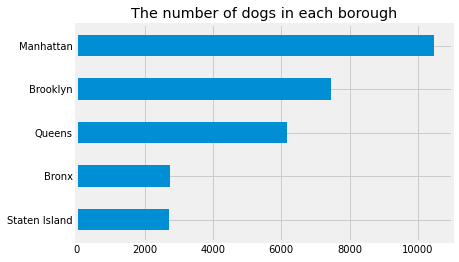

In [314]:
#graph
df.borough.value_counts().sort_values().plot(kind="barh")
plt.title("The number of dogs in each borough")
plt.show()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [323]:
#population data
boro_population = pd.read_csv('boro_population.csv')
boro_population = boro_population.set_index('borough')

In [324]:
#add dog counts
boro_population['dogs'] = df.borough.value_counts()

In [330]:
#calculate per capita dogs
boro_population['per_capita_dogs'] = boro_population.dogs / boro_population.population

In [349]:
#sort values
boro_population = boro_population.sort_values(by='per_capita_dogs', ascending=False)

In [350]:
boro_population

population  area_sqmi   dogs  per_capita_dogs
borough                                                     
Manhattan         1644518         23  10478         0.006371
Staten Island      474558         59   2727         0.005746
Brooklyn          2636735         71   7466         0.002832
Queens            2339150        109   6154         0.002631
Bronx             1455444         42   2748         0.001888

In [353]:
print(f"{boro_population.index[0]} is borough with the highest number of dogs per-capita.")

Manhattan is borough with the highest number of dogs per-capita.


In [339]:
#check with the whole data set
#Manhattan is still the borough with the highest number
df_all = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')
df_all = df_all.merge(zipcode, left_on='Owner Zip Code', right_on='zip')
(df_all.borough.value_counts() / boro_population.population).sort_values(ascending= False)

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [357]:
df['dogs_count'] = 1

In [362]:
#count number of dogs of each breed for each borough
borough_df = df.groupby(['borough','Primary Breed']).sum()[['dogs_count']]

In [365]:
#rank
borough_df['dogs_rank'] = borough_df.groupby(level=0).dogs_count.rank(ascending=False, method="min")

In [366]:
#top5 table
borough_df[borough_df.dogs_rank<=5]

dogs_count  dogs_rank
borough       Primary Breed                                            
Bronx         American Pit Bull Terrier/Pit Bull         181        4.0
              Chihuahua                                  208        3.0
              Maltese                                    139        5.0
              Shih Tzu                                   244        2.0
              Yorkshire Terrier                          250        1.0
Brooklyn      Chihuahua                                  391        3.0
              Labrador Retriever                         255        4.0
              Maltese                                    247        5.0
              Shih Tzu                                   481        2.0
              Yorkshire Terrier                          501        1.0
Manhattan     Chihuahua                                  511        1.0
              Labrador Retriever                         422        4.0
              Maltese                                    332        5.0
              Shih Tzu                                   454        3.0
              Yorkshire Terrier                          505        2.0
Queens        Chihuahua                                  306        3.0
              Labrador Retriever                         208        5.0
              Maltese                                    305        4.0
              Shih Tzu                                   395        2.0
              Yorkshire Terrier                          434        1.0
Staten Island Chihuahua                                  100        4.0
              Labrador Retriever                         123        3.0
              Maltese                                     93        5.0
              Shih Tzu                                   165        2.0
              Yorkshire Terrier                          171        1.0

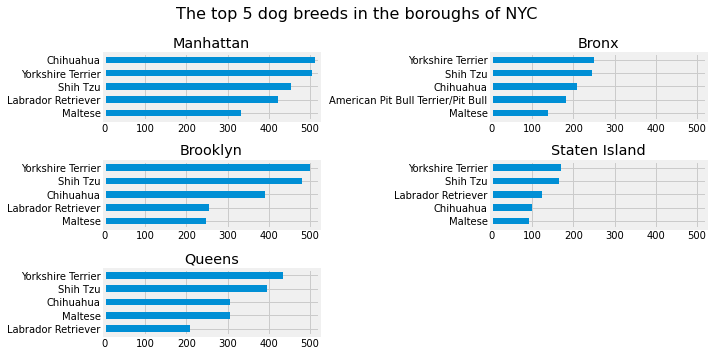

In [368]:
#data
#top5 breeds of each boroughs 
source = borough_df[borough_df.dogs_rank<=5]

fig = plt.figure(figsize=(10,5))
fig.suptitle('The top 5 dog breeds in the boroughs of NYC', fontsize=16)

xlim = source.dogs_count.max() +10

i = 1
for borough in df.borough.unique():
    ax = fig.add_subplot(3, 2, i)
    ax = source.loc[borough,'dogs_count'].rename_axis('').sort_values().plot(kind="barh")
    ax.set_xlim(0, xlim)
    ax.set_title(f"{borough}")
    i+=1

fig.tight_layout()
plt.show()